<a href="https://colab.research.google.com/github/Hyun-ho-Lee/project/blob/master/house_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from datetime import datetime
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drvie')

Drive already mounted at /content/drvie; to attempt to forcibly remount, call drive.mount("/content/drvie", force_remount=True).


In [ ]:
train=pd.read_csv("/content/drvie/MyDrive/housetrain.csv")
test=pd.read_csv("/content/drvie/MyDrive/housetest.csv")

In [ ]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [ ]:
train.head(3)
print(train.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


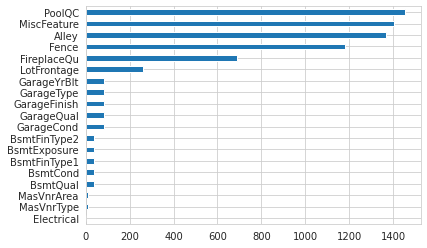

In [ ]:
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.barh()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

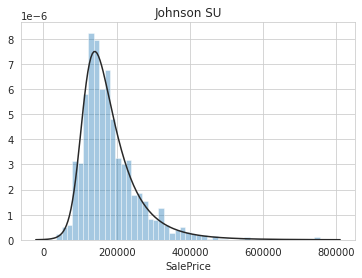

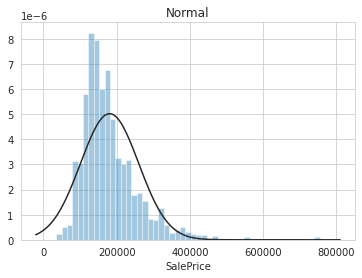

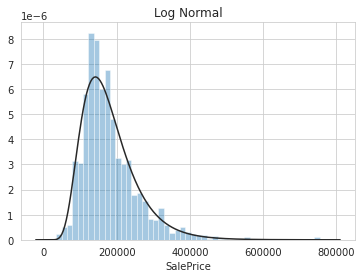

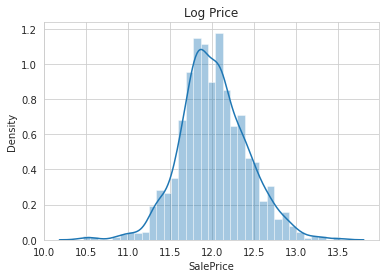

In [ ]:
y = train['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)
target = np.log(train.SalePrice)
plt.figure(4); plt.title("Log Price")
sns.distplot(target, kde=True)


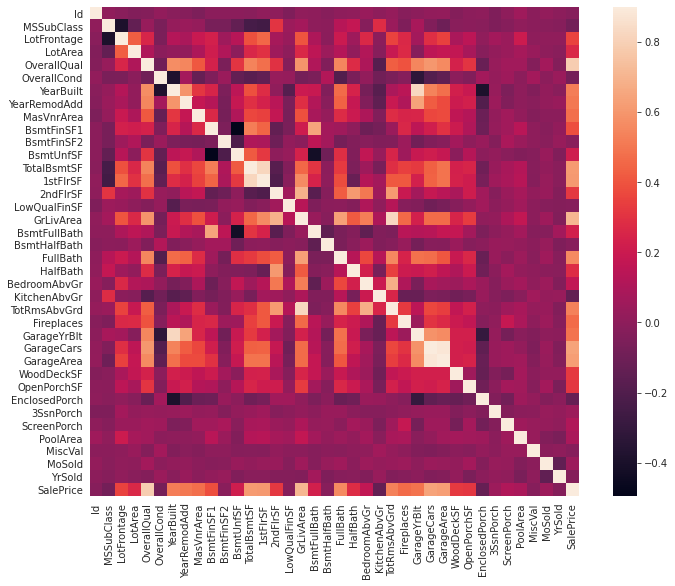

In [ ]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [ ]:
numeric_feature=train.select_dtypes(include=[np.number])
numeric_feature.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [ ]:
numeric_feature.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [ ]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['SalePrice']
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))


all_data size is : (2919, 80)


In [ ]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)


,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

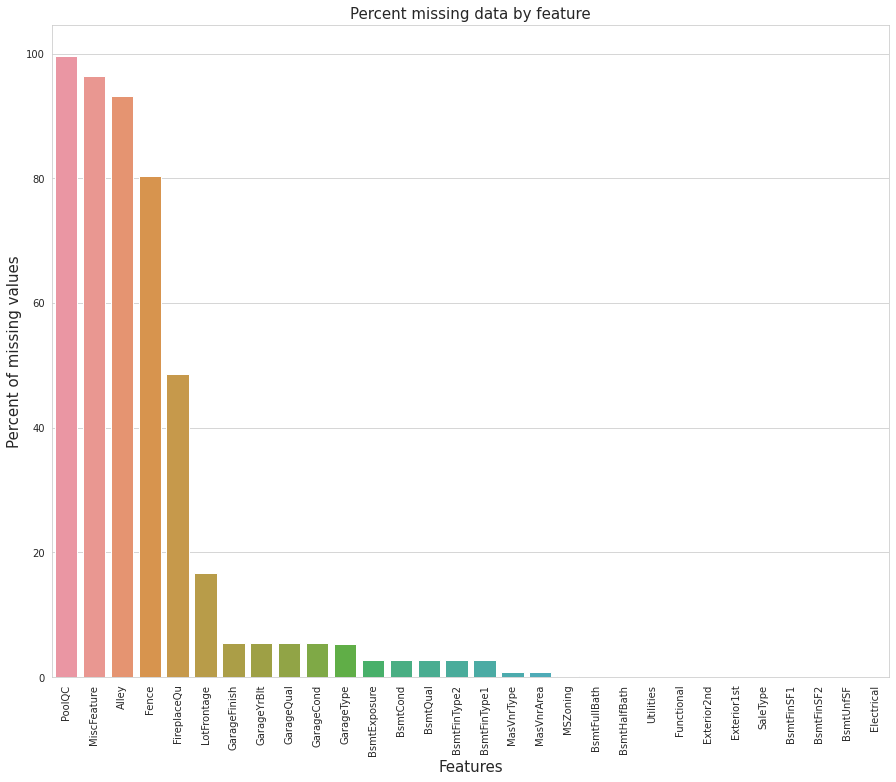

In [ ]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [ ]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["PoolQC"].value_counts()

None    2909
Gd         4
Ex         4
Fa         2
Name: PoolQC, dtype: int64

In [ ]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["MiscFeature"].value_counts()


None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [ ]:
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [ ]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [ ]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [ ]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [ ]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [ ]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [ ]:
all_data = all_data.drop(['Utilities'], axis=1)

In [ ]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [ ]:
for i in ('Electrical', 'KitchenQual', 'Exterior1st','Exterior2nd','SaleType'):
  all_data[i]=all_data[i].fillna(all_data[i].mode()[0])

In [ ]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [ ]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [ ]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()


,Missing Ratio


In [ ]:
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 79)


In [ ]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)


In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))
all_data

Shape all_data: (2919, 79)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,10,RL,65.0,8450,1,1,3,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,4,3,2,706.0,6,0.0,150.0,856.0,GasA,0,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,Attchd,2003.0,2,2.0,548.0,5,5,2,0,61,0,0,0,0,3,4,None,0,4,2,WD,Normal
1,2,5,RL,80.0,9600,1,1,3,Lvl,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,4,1,0,978.0,6,0.0,284.0,1262.0,GasA,0,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,Attchd,1976.0,2,2.0,460.0,5,5,2,298,0,0,0,0,0,3,4,None,0,7,1,WD,Normal
2,3,10,RL,68.0,11250,1,1,0,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,4,2,2,486.0,6,0.0,434.0,920.0,GasA,0,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,Attchd,2001.0,2,2.0,608.0,5,5,2,0,42,0,0,0,0,3,4,None,0,11,2,WD,Normal
3,4,11,RL,60.0,9550,1,1,0,Lvl,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,4,1,3,0,216.0,6,0.0,540.0,756.0,GasA,2,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,Detchd,1998.0,3,3.0,642.0,5,5,2,0,35,272,0,0,0,3,4,None,0,4,0,WD,Abnorml
4,5,10,RL,84.0,14260,1,1,0,Lvl,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,4,0,2,655.0,6,0.0,490.0,1145.0,GasA,0,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,Attchd,2000.0,2,3.0,836.0,5,5,2,192,84,0,0,0,0,3,4,None,0,3,2,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,2,RM,21.0,1936,1,1,3,Lvl,Inside,0,MeadowV,Norm,Norm,Twnhs,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,4,4,3,6,0.0,6,0.0,546.0,546.0,GasA,2,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,6,0,3,None,0.0,1,0.0,0.0,3,3,2,0,0,0,0,0,0,3,4,None,0,8,0,WD,Normal
2915,2916,2,RM,21.0,1894,1,1,3,Lvl,Inside,0,MeadowV,Norm,Norm,TwnhsE,2Story,4,4,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,4,4,3,5,252.0,6,0.0,294.0,546.0,GasA,4,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,6,0,3,CarPort,1970.0,3,1.0,286.0,5,5,2,0,24,0,0,0,0,3,4,None,0,6,0,WD,Abnorml
2916,2917,5,RL,160.0,20000,1,1,3,Lvl,Inside,0,Mitchel,Norm,Norm,1Fam,1Story,5,6,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,4,4,3,0,1224.0,6,0.0,0.0,1224.0,GasA,0,1,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,6,1,5,Detchd,1960.0,3,2.0,576.0,5,5,2,474,0,0,0,0,0,3,4,None,0,11,0,WD,Abnorml
2917,2918,14,RL,62.0,10441,1,1,3,Lvl,Inside,0,Mitchel,Norm,Norm,1Fam,SFoyer,5,4,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,3,4,PConc,2,4,0,2,337.0,6,0.0,575.0,912.0,GasA,4,1,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,3,6,6,0,3,None,0.0,1,0.0,0.0,3,3,2,80,32,0,0,0,0,3,2,Shed,700,9,0,WD,Normal


In [ ]:
all_data['BsmtQual']
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,10,RL,65.0,8450,1,1,3,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,4,3,2,706.0,6,0.0,150.0,856.0,GasA,0,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,Attchd,2003.0,2,2.0,548.0,5,5,2,0,61,0,0,0,0,3,4,None,0,4,2,WD,Normal
1,2,5,RL,80.0,9600,1,1,3,Lvl,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,4,1,0,978.0,6,0.0,284.0,1262.0,GasA,0,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,Attchd,1976.0,2,2.0,460.0,5,5,2,298,0,0,0,0,0,3,4,None,0,7,1,WD,Normal
2,3,10,RL,68.0,11250,1,1,0,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,4,2,2,486.0,6,0.0,434.0,920.0,GasA,0,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,Attchd,2001.0,2,2.0,608.0,5,5,2,0,42,0,0,0,0,3,4,None,0,11,2,WD,Normal
3,4,11,RL,60.0,9550,1,1,0,Lvl,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,4,1,3,0,216.0,6,0.0,540.0,756.0,GasA,2,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,Detchd,1998.0,3,3.0,642.0,5,5,2,0,35,272,0,0,0,3,4,None,0,4,0,WD,Abnorml
4,5,10,RL,84.0,14260,1,1,0,Lvl,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,4,0,2,655.0,6,0.0,490.0,1145.0,GasA,0,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,Attchd,2000.0,2,3.0,836.0,5,5,2,192,84,0,0,0,0,3,4,None,0,3,2,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,2,RM,21.0,1936,1,1,3,Lvl,Inside,0,MeadowV,Norm,Norm,Twnhs,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,4,4,3,6,0.0,6,0.0,546.0,546.0,GasA,2,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,6,0,3,None,0.0,1,0.0,0.0,3,3,2,0,0,0,0,0,0,3,4,None,0,8,0,WD,Normal
2915,2916,2,RM,21.0,1894,1,1,3,Lvl,Inside,0,MeadowV,Norm,Norm,TwnhsE,2Story,4,4,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,4,4,3,5,252.0,6,0.0,294.0,546.0,GasA,4,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,6,0,3,CarPort,1970.0,3,1.0,286.0,5,5,2,0,24,0,0,0,0,3,4,None,0,6,0,WD,Abnorml
2916,2917,5,RL,160.0,20000,1,1,3,Lvl,Inside,0,Mitchel,Norm,Norm,1Fam,1Story,5,6,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,4,4,3,0,1224.0,6,0.0,0.0,1224.0,GasA,0,1,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,6,1,5,Detchd,1960.0,3,2.0,576.0,5,5,2,474,0,0,0,0,0,3,4,None,0,11,0,WD,Abnorml
2917,2918,14,RL,62.0,10441,1,1,3,Lvl,Inside,0,Mitchel,Norm,Norm,1Fam,SFoyer,5,4,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,3,4,PConc,2,4,0,2,337.0,6,0.0,575.0,912.0,GasA,4,1,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,3,6,6,0,3,None,0.0,1,0.0,0.0,3,3,2,80,32,0,0,0,0,3,2,Shed,700,9,0,WD,Normal


In [ ]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [ ]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
all_data


Skew in numerical features: 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,1,10,RL,65.0,8450,1,1,3,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,4,3,2,706.0,6,0.0,150.0,856.0,GasA,0,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,Attchd,2003.0,2,2.0,548.0,5,5,2,0,61,0,0,0,0,3,4,None,0,4,2,WD,Normal,2566.0
1,2,5,RL,80.0,9600,1,1,3,Lvl,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,4,1,0,978.0,6,0.0,284.0,1262.0,GasA,0,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,Attchd,1976.0,2,2.0,460.0,5,5,2,298,0,0,0,0,0,3,4,None,0,7,1,WD,Normal,2524.0
2,3,10,RL,68.0,11250,1,1,0,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,4,2,2,486.0,6,0.0,434.0,920.0,GasA,0,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,Attchd,2001.0,2,2.0,608.0,5,5,2,0,42,0,0,0,0,3,4,None,0,11,2,WD,Normal,2706.0
3,4,11,RL,60.0,9550,1,1,0,Lvl,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,4,1,3,0,216.0,6,0.0,540.0,756.0,GasA,2,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,Detchd,1998.0,3,3.0,642.0,5,5,2,0,35,272,0,0,0,3,4,None,0,4,0,WD,Abnorml,2473.0
4,5,10,RL,84.0,14260,1,1,0,Lvl,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,4,0,2,655.0,6,0.0,490.0,1145.0,GasA,0,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,Attchd,2000.0,2,3.0,836.0,5,5,2,192,84,0,0,0,0,3,4,None,0,3,2,WD,Normal,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,2,RM,21.0,1936,1,1,3,Lvl,Inside,0,MeadowV,Norm,Norm,Twnhs,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,4,4,3,6,0.0,6,0.0,546.0,546.0,GasA,2,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,6,0,3,None,0.0,1,0.0,0.0,3,3,2,0,0,0,0,0,0,3,4,None,0,8,0,WD,Normal,1638.0
2915,2916,2,RM,21.0,1894,1,1,3,Lvl,Inside,0,MeadowV,Norm,Norm,TwnhsE,2Story,4,4,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,4,4,3,5,252.0,6,0.0,294.0,546.0,GasA,4,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,6,0,3,CarPort,1970.0,3,1.0,286.0,5,5,2,0,24,0,0,0,0,3,4,None,0,6,0,WD,Abnorml,1638.0
2916,2917,5,RL,160.0,20000,1,1,3,Lvl,Inside,0,Mitchel,Norm,Norm,1Fam,1Story,5,6,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,4,4,3,0,1224.0,6,0.0,0.0,1224.0,GasA,0,1,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,6,1,5,Detchd,1960.0,3,2.0,576.0,5,5,2,474,0,0,0,0,0,3,4,None,0,11,0,WD,Abnorml,2448.0
2917,2918,14,RL,62.0,10441,1,1,3,Lvl,Inside,0,Mitchel,Norm,Norm,1Fam,SFoyer,5,4,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,3,4,PConc,2,4,0,2,337.0,6,0.0,575.0,912.0,GasA,4,1,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,3,6,6,0,3,None,0.0,1,0.0,0.0,3,3,2,80,32,0,0,0,0,3,2,Shed,700,9,0,WD,Normal,1882.0


In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

all_data

There are 60 skewed numerical features to Box Cox transform


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,0.730463,2.885846,RL,5.831328,19.212182,0.730463,0.730463,1.540963,Lvl,Inside,0.000000,CollgCr,Norm,Norm,1Fam,2Story,2.440268,1.820334,14.187527,14.187527,Gable,CompShg,VinylSd,VinylSd,BrkFace,8.059126,1.194318,1.820334,PConc,1.194318,1.820334,1.540963,1.194318,11.170327,2.259674,0.0,7.483296,11.692623,GasA,0.000000,0.730463,SBrkr,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.602594,2.259674,0.000000,1.540963,Attchd,14.187527,1.194318,1.194318,10.506271,2.055642,2.055642,1.194318,0.000000,5.714669,0.000000,0.0,0.0,0.0,1.540963,1.820334,None,0.000000,1.820334,1.194318,WD,Normal,14.976591
1,1.194318,2.055642,RL,6.221214,19.712205,0.730463,0.730463,1.540963,Lvl,FR2,0.000000,Veenker,Feedr,Norm,1Fam,1Story,2.259674,2.440268,14.145138,14.145138,Gable,CompShg,MetalSd,MetalSd,None,0.000000,1.540963,1.820334,CBlock,1.194318,1.820334,0.730463,0.000000,12.062832,2.259674,0.0,8.897844,12.792276,GasA,0.000000,0.730463,SBrkr,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,1.540963,2.259674,2.259674,0.730463,2.055642,Attchd,14.145138,1.194318,1.194318,10.062098,2.055642,2.055642,1.194318,9.010206,0.000000,0.000000,0.0,0.0,0.0,1.540963,1.820334,None,0.000000,2.440268,0.730463,WD,Normal,14.923100
2,1.540963,2.885846,RL,5.914940,20.347241,0.730463,0.730463,0.000000,Lvl,Inside,0.000000,CollgCr,Norm,Norm,1Fam,2Story,2.440268,1.820334,14.184404,14.185966,Gable,CompShg,VinylSd,VinylSd,BrkFace,7.646538,1.194318,1.820334,PConc,1.194318,1.820334,1.194318,1.194318,10.200343,2.259674,0.0,9.917060,11.892039,GasA,0.000000,0.730463,SBrkr,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.259674,2.259674,0.730463,2.055642,Attchd,14.184404,1.194318,1.194318,10.775536,2.055642,2.055642,1.194318,0.000000,5.053371,0.000000,0.0,0.0,0.0,1.540963,1.820334,None,0.000000,3.011340,1.194318,WD,Normal,15.149678
3,1.820334,3.011340,RL,5.684507,19.691553,0.730463,0.730463,0.000000,Lvl,Corner,0.000000,Crawfor,Norm,Norm,1Fam,2Story,2.440268,1.820334,14.047529,14.135652,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,1.540963,1.820334,BrkTil,1.820334,0.730463,1.540963,0.000000,8.274266,2.259674,0.0,10.468500,11.354094,GasA,1.194318,0.730463,SBrkr,12.013683,11.354094,0.0,13.711364,0.730463,0.000000,0.730463,0.000000,1.540963,0.730463,1.194318,2.440268,2.259674,0.730463,1.194318,Detchd,14.179714,1.540963,1.540963,10.918253,2.055642,2.055642,1.194318,0.000000,4.745132,8.797736,0.0,0.0,0.0,1.540963,1.820334,None,0.000000,1.820334,0.000000,WD,Abnorml,14.857121
4,2.055642,2.885846,RL,6.314735,21.325160,0.730463,0.730463,0.000000,Lvl,FR2,0.000000,NoRidge,Norm,Norm,1Fam,2Story,2.602594,1.820334,14.182841,14.182841,Gable,CompShg,VinylSd,VinylSd,BrkFace,9.391827,1.194318,1.820334,PConc,1.194318,1.820334,0.000000,1.194318,10.971129,2.259674,0.0,10.221051,12.510588,GasA,0.000000,0.730463,SBrkr,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,0.730463,1.194318,2.750250,2.259674,0.730463,2.055642,Attchd,14.182841,1.194318,1.540963,11.627708,2.055642,2.055642,1.194318,8.013884,6.314735,0.000000,0

In [ ]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 222)


In [ ]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [ ]:
pip install pycaret

In [ ]:
train['Income']=y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from pycaret.regression import *
exp_reg = setup(train, target = 'Income')

,Description,Value
0,session_id,8142
1,Target,Income
2,Original Data,"(1460, 223)"
3,Missing Values,False
4,Numeric Features,220
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 219)"


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16840.4108,9.031290e+08,28805.2739,0.8710,0.1341,0.0959,0.472
et,Extra Trees Regressor,17376.0040,9.984642e+08,29751.2067,0.8582,0.1445,0.1027,1.387
lightgbm,Light Gradient Boosting Machine,17449.5401,9.941436e+08,30234.8880,0.8582,0.1381,0.0987,0.165
rf,Random Forest Regressor,17955.6825,1.013618e+09,30511.4664,0.8531,0.1477,0.1053,1.510
huber,Huber Regressor,19101.6062,1.193934e+09,32386.5898,0.8391,0.1752,0.1084,0.111
llar,Lasso Least Angle Regression,20153.2455,1.156948e+09,32470.5069,0.8315,0.1843,0.1193,0.264
lasso,Lasso Regression,20491.8291,1.221060e+09,33429.8086,0.8244,0.1876,0.1206,0.077
ridge,Ridge Regression,20304.7553,1.269797e+09,33715.7172,0.8231,0.2294,0.1189,0.017
br,Bayesian Ridge,19986.3820,1.312076e+09,33846.5211,0.8212,0.1978,0.1168,0.077
omp,Orthogonal Matching Pursuit,22389.0276,1.348816e+09,35255.3184,0.8058,0.1839,0.1342,0.017


In [ ]:
gbr=create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16105.0973,4.474540e+08,21153.1079,0.8965,0.1452,0.1100
1,21428.6287,1.811829e+09,42565.5802,0.7963,0.1723,0.1171
2,14839.4625,4.329823e+08,20808.2275,0.9252,0.1131,0.0895
3,16076.3356,6.922345e+08,26310.3494,0.8320,0.1489,0.1082
4,15092.4999,6.141073e+08,24781.1890,0.9247,0.1217,0.0852
5,19645.2742,1.548609e+09,39352.3707,0.8422,0.1321,0.0896
6,15375.9545,4.646702e+08,21556.2112,0.9076,0.1134,0.0883
7,17342.0498,1.147286e+09,33871.6150,0.8574,0.1254,0.0888
8,13671.2504,3.451102e+08,18577.1431,0.9422,0.0952,0.0708
9,18827.5548,1.527008e+09,39076.9448,0.7859,0.1737,0.1114


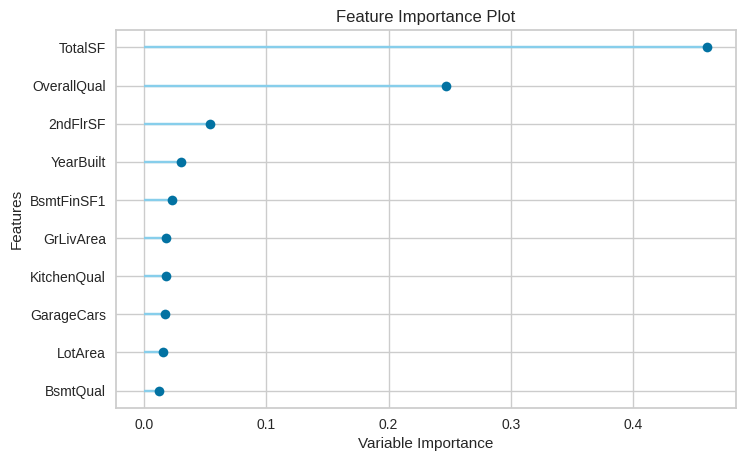

In [ ]:
plot_model(estimator = gbr, plot = 'feature')

In [ ]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,20573.3112,7.930832e+08,28161.7329,0.8166,0.1854,0.1411
1,24876.6178,2.596994e+09,50960.7126,0.7081,0.1954,0.1398
2,15443.7926,6.056480e+08,24609.9168,0.8953,0.1262,0.0928
3,17098.5840,6.617206e+08,25723.9298,0.8394,0.1731,0.1224
4,20747.0226,1.027024e+09,32047.2217,0.8740,0.1557,0.1157
5,21840.0136,1.269773e+09,35633.8685,0.8706,0.1464,0.1065
6,19292.1419,7.350534e+08,27111.8691,0.8539,0.1414,0.1104
7,21948.4608,1.837150e+09,42861.9836,0.7717,0.1598,0.1147
8,16066.2542,5.409747e+08,23258.8619,0.9093,0.1167,0.0845
9,24180.4689,1.614697e+09,40183.2946,0.7736,0.1886,0.1395


In [ ]:
gbr_final = finalize_model(gbr)

In [ ]:
predict_cat = predict_model(gbr_final, test)

In [ ]:
predict_cat.head(3)

In [ ]:
predict_cat

In [ ]:
test

In [ ]:
predict_cat.index

RangeIndex(start=1460, stop=2919, step=1)

In [ ]:
sub = pd.DataFrame()
sub['Id'] = predict_cat.index
sub['SalePrice'] = predict_cat["Label"]
sub.to_csv('submission1.csv',index=False)

In [ ]:
sub = pd.DataFrame()
sub['Id'] = predict_cat['Id']
sub['SalePrice'] =predict_cat['Label']
sub.to_csv('submission.csv',index=False)

In [ ]:
sub['Id']=predict_cat.index
sub

,Id,SalePrice
1460,1460,119795.566997
1461,1461,160798.231359
1462,1462,188640.490500
1463,1463,182956.102833
1464,1464,187045.473260
...,...,...
2914,2914,84662.355398
2915,2915,84310.372082
2916,2916,149612.003023
2917,2917,121806.866666


In [ ]:
sub.to_csv('submission.csv',index=False)

In [ ]:
print("all_data size is : {}".format(all_data.shape))
print("all_data size is : {}".format(sub.shape))

all_data size is : (2919, 222)
all_data size is : (1459, 2)


In [ ]:
test